<a href="https://colab.research.google.com/github/naomifridman/Machine_learning_tutorials_and_utils/blob/master/google_colab_to_run_kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook example to load and save data from Google Colab 

## Demonstration of Kaggle competition
* https://www.kaggle.com/c/ieee-fraud-detection

In [0]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 4

import os
import time
import datetime
import json
import gc
from numba import jit

import numpy as np
import pandas as pd

from itertools import product

import lightgbm as lgb
import xgboost as xgb
import time
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn import metrics
from sklearn import linear_model
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from IPython.display import HTML
import json

import matplotlib.pyplot as plt
%matplotlib inline



# Data load

In [0]:
DATA_IN_GOOGLE_CLOUD = False
DATA_ON_LOCAL_MACHINE = False
DATA_IN_KAGGLE = True
I_AM_IN_KAGGLE_KERNEL = False
PATH =''



## Load data from your computer
## Read csv  file from local
To read csv file  file from local machine, you need to upload it to your "workspace" and then call:
`df = pd.read_csv(<filename>)`



In [0]:
from google.colab import files

if DATA_ON_LOCAL_MACHINE:
    uploaded = files.upload()

## Load data from Google drive
* Create a drive for your project. Its not a must, but keep files in order.

## Use Google drive as storage
You can use your drive as disk, to save and load files. You need to:

### Allow usage of your drive.
In more accurate terms, mount a specific folder in your drive to a local disk.
* Run the following cell
* Open link
* Allow usage
* Copy key from window
* paste key bellow and press enter

## Filepath
Now you can accsess or create files, in the usual Python way,when:
`/content/gdrive/My Drive/`
Is the root path to your drive.
So use the following file path.
```
/content/gdrive/My Drive/<file path in your google drive tree>
```

In [0]:
from google.colab import drive

if DATA_IN_GOOGLE_CLOUD:
  PATH = '/content/gdrive/My Drive/' + 'Naya/kaggle/fraud/'

  drive.mount('/content/gdrive')

In [0]:
 if DATA_IN_GOOGLE_CLOUD:
    train_transaction = pd.read_csv(PATH + 'train_transaction.csv', index_col='TransactionID')
    test_transaction = pd.read_csv(PATH + 'test_transaction.csv', index_col='TransactionID')

    train_identity = pd.read_csv(PATH + 'train_identity.csv', index_col='TransactionID')
    test_identity = pd.read_csv(PATH + 'test_identity.csv', index_col='TransactionID')

    sample_submission = pd.read_csv(PATH + 'sample_submission.csv', index_col='TransactionID')

## Load data from Kagggle in Google colab
Thanks https://www.kaggle.com/aldrickpaul to for this answer, https://www.kaggle.com/general/51898
### Create an API token from your kaggle account.
* Choose `Edit Profile` in your 'My Profile' page.
* Use 'Create API Token' link to download kaggle.jason file.
* Open the jason file in any editor, and copy the keys to the bellow code:
* Copy the download command from the competition data page. Its in small leters near the download arrow. 

In [6]:
if DATA_IN_KAGGLE:
  os.environ['KAGGLE_USERNAME']='ripcurl' #xxxxxx
  os.environ['KAGGLE_KEY']='27c21759bd838377cc8c9f15c5bcbefd' #xxxxxx

  !kaggle competitions download -c ieee-fraud-detection # api copied from kaggle
  
  train_transaction = pd.read_csv('train_transaction.csv.zip', index_col='TransactionID')
  test_transaction = pd.read_csv('test_transaction.csv.zip', index_col='TransactionID')

  train_identity = pd.read_csv('train_identity.csv.zip', index_col='TransactionID')
  test_identity = pd.read_csv('test_identity.csv.zip', index_col='TransactionID')

  sample_submission = pd.read_csv('sample_submission.csv.zip', index_col='TransactionID')

 97% 51.0M/52.5M [00:00<00:00, 50.8MB/s]
100% 52.5M/52.5M [00:00<00:00, 97.3MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 99.2MB/s]
 97% 46.0M/47.3M [00:02<00:00, 17.6MB/s]
100% 47.3M/47.3M [00:02<00:00, 21.8MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 97.2MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 156MB/s]


In [0]:
NOT_FIRST_TIME=True

In [0]:
if DATA_IN_KAGGLE & NOT_FIRST_TIME:
  train_transaction = pd.read_csv(PATH+'train_transaction.csv.zip', index_col='TransactionID')
  test_transaction = pd.read_csv(PATH+'test_transaction.csv.zip', index_col='TransactionID')

  train_identity = pd.read_csv(PATH+'train_identity.csv.zip', index_col='TransactionID')
  test_identity = pd.read_csv(PATH+'test_identity.csv.zip', index_col='TransactionID')

  sample_submission = pd.read_csv(PATH+'sample_submission.csv.zip', index_col='TransactionID')

In [9]:
!ls 

sample_data		   test_identity.csv.zip     train_identity.csv.zip
sample_submission.csv.zip  test_transaction.csv.zip  train_transaction.csv.zip


## Load data from Kagggle when in kaggle kernel

In [0]:
if I_AM_IN_KAGGLE_KERNEL:
  PATH = '../input/'
  
  train_transaction = pd.read_csv(PATH+'train_transaction.csv', index_col='TransactionID')
  test_transaction = pd.read_csv(PATH+'test_transaction.csv', index_col='TransactionID')

  train_identity = pd.read_csv(PATH+'train_identity.csv', index_col='TransactionID')
  test_identity = pd.read_csv(PATH+'test_identity.csv', index_col='TransactionID')

  sample_submission = pd.read_csv(PATH+'sample_submission.csv', index_col='TransactionID')

## Basic EDA
Mostly taken from the foolowing notebooks:

* https://www.kaggle.com/artgor/eda-and-models

*

In [0]:
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)


In [0]:
#train=train.replace([np.inf, -np.inf], np.nan)
#test=test.replace([np.inf, -np.inf], np.nan)

## Delete cols and rows full of None

In [0]:
isna = train.isnull().sum(axis=0)



In [14]:
isna=isna.sort_values(ascending =False)
isna.iloc[0:10],len(train)

(id_24    585793
 id_25    585408
 id_07    585385
 id_08    585385
 id_21    585381
 id_26    585377
 id_22    585371
 id_23    585371
 id_27    585371
 dist2    552913
 dtype: int64, 590540)

In [15]:
isna.index, isna.loc[isna.index[4]]*100./len(train)*1.

(Index(['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_22', 'id_23',
        'id_27', 'dist2',
        ...
        'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'isFraud'],
       dtype='object', length=433), 99.12639279303689)

In [0]:
col=isna.index[0]

In [0]:
cols = list(train.columns)


In [18]:
for i in range(len(isna)):
  if (isna.loc[isna.index[i]]*100./len(train)*1. > 70):
    cols.remove(isna.index[i])
    
    print('deleting col: ', isna.index[i], 'num null: ', isna.loc[isna.index[i]])
    
    

deleting col:  id_24 num null:  585793
deleting col:  id_25 num null:  585408
deleting col:  id_07 num null:  585385
deleting col:  id_08 num null:  585385
deleting col:  id_21 num null:  585381
deleting col:  id_26 num null:  585377
deleting col:  id_22 num null:  585371
deleting col:  id_23 num null:  585371
deleting col:  id_27 num null:  585371
deleting col:  dist2 num null:  552913
deleting col:  D7 num null:  551623
deleting col:  id_18 num null:  545427
deleting col:  D13 num null:  528588
deleting col:  D14 num null:  528353
deleting col:  D12 num null:  525823
deleting col:  id_04 num null:  524216
deleting col:  id_03 num null:  524216
deleting col:  D6 num null:  517353
deleting col:  id_33 num null:  517251
deleting col:  id_10 num null:  515614
deleting col:  D8 num null:  515614
deleting col:  D9 num null:  515614
deleting col:  id_09 num null:  515614
deleting col:  id_30 num null:  512975
deleting col:  id_32 num null:  512954
deleting col:  id_34 num null:  512735
dele

In [26]:
cols, len(cols)

(['TransactionDT',
  'TransactionAmt',
  'ProductCD',
  'card1',
  'card2',
  'card3',
  'card4',
  'card5',
  'card6',
  'addr1',
  'addr2',
  'dist1',
  'P_emaildomain',
  'C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'C13',
  'C14',
  'D1',
  'D2',
  'D3',
  'D4',
  'D5',
  'D10',
  'D11',
  'D15',
  'M1',
  'M2',
  'M3',
  'M4',
  'M5',
  'M6',
  'M7',
  'M8',
  'M9',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'V29',
  'V30',
  'V31',
  'V32',
  'V33',
  'V34',
  'V35',
  'V36',
  'V37',
  'V38',
  'V39',
  'V40',
  'V41',
  'V42',
  'V43',
  'V44',
  'V45',
  'V46',
  'V47',
  'V48',
  'V49',
  'V50',
  'V51',
  'V52',
  'V53',
  'V54',
  'V55',
  'V56',
  'V57',
  'V58',
  'V59',
  'V60',
  'V61',
  'V62',
  'V63',
  'V64',
  'V6

In [19]:
test.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
train = train[cols]

In [0]:
test=test[cols]

In [28]:
isna = train.isna().sum(axis=1)
train['isna']=isna
isna=isna.sort_values(ascending =False)
isna.iloc[0:10],train.shape

(TransactionID
 3443104    146
 3461068    145
 3461362    145
 3461061    145
 3443122    145
 3509237    133
 3509200    133
 3509592    133
 3509348    133
 3509570    131
 dtype: int64, (590540, 226))

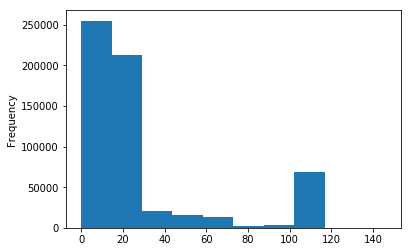

In [29]:
isna.plot(kind='hist')

In [30]:
train['isna']

TransactionID
2987000     26
2987001     22
2987002      3
2987003     19
2987004    111
2987005      6
2987006      3
2987007     22
2987008    111
2987009      3
2987010     23
2987011     26
2987012     19
2987013     21
2987014     22
2987015     25
2987016    111
2987017    111
2987018      5
2987019     19
2987020      3
2987021     21
2987022    111
2987023      8
2987024     21
2987025     23
2987026     21
2987027      7
2987028     40
2987029     22
          ... 
3577510      4
3577511      2
3577512      4
3577513      4
3577514      3
3577515      3
3577516      5
3577517      2
3577518      3
3577519      7
3577520      0
3577521     23
3577522      0
3577523     21
3577524      3
3577525      2
3577526    123
3577527      6
3577528      5
3577529     26
3577530     24
3577531    123
3577532      3
3577533      2
3577534     26
3577535     22
3577536      4
3577537      9
3577538      3
3577539      4
Name: isna, Length: 590540, dtype: int64

In [31]:
train.loc[train['isFraud'] == 1, 'isna'] = 0
train = train.sort_values(by=['isna'], ascending=False)

train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,...,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,isna
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3443104,0,11659620,35.658,C,1164,545.0,185.0,visa,137.0,debit,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M2,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,146
3461068,0,12252702,64.370,C,11772,555.0,119.0,mastercard,224.0,credit,NaN,NaN,NaN,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M2,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,145
3461061,0,12252669,176.448,C,7794,266.0,185.0,mastercard,102.0,credit,NaN,NaN,NaN,gmail.com,41.0,41.0,0.0,8.0,0.0,8.0,8.0,3.0,0.0,1.0,6.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M2,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,145
3443122,0,11659920,9.591,C,4461,375.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M2,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,145
3461362,0,12258065,12.173,C,15885,545.0,185.0,visa,138.0,debit,NaN,NaN,NaN,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M2,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,145


In [32]:
len(train.loc[train['isna'] >15]), len(train.loc[train['isna'] >=25])*100./len(train)

(319639, 27.836725708673416)

In [0]:
train= train[train['isna'] <= 25]

### Down sample

In [0]:
train=train.drop(train[train['isFraud']==0].sample(frac=.25).index)

In [35]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,...,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,isna
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3330785,0,8468834,29.304,C,9026,545.0,185.0,visa,137.0,credit,NaN,NaN,NaN,yahoo.com.mx,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,455.0,455.0,0.0,NaN,0.0,NaN,NaN,NaN,M2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
3112793,0,2492427,329.950,W,16255,470.0,150.0,mastercard,137.0,credit,251.0,87.0,28.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,T,T,T,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
3397220,0,10361386,13.534,C,9633,130.0,185.0,visa,138.0,debit,NaN,NaN,NaN,gmail.com,3.0,3.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,3.0,3.0,0.0,NaN,NaN,74.0,52.0,0.0,NaN,0.0,NaN,NaN,NaN,M2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
3314756,0,8053552,12.567,C,15315,202.0,185.0,mastercard,137.0,credit,NaN,NaN,NaN,hotmail.com,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,NaN,NaN,440.0,347.0,0.0,NaN,0.0,NaN,NaN,NaN,M2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
3026673,0,961937,77.950,W,7411,383.0,150.0,visa,226.0,debit,205.0,87.0,9.0,NaN,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,T,T,T,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25


In [0]:
#train = train.reset_index().drop(columns = 'TransactionID')


In [0]:
#test = test.reset_index().drop(columns = 'TransactionID')

In [39]:
# dummy
memo = ["card4", "M1", "M2", "M3", #"P_emaildomain_bin", #"P_emaildomain_suffix", 
        "M4", "M5", "M6", "M7", "M8", "M9", "ProductCD"]


train[memo]

,card4,M1,M2,M3,M4,M5,M6,M7,M8,M9,ProductCD
TransactionID,,,,,,,,,,,
3330785,visa,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,C
3112793,mastercard,T,T,T,NaN,NaN,T,F,F,T,W
3397220,visa,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,C
3314756,mastercard,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,C
3026673,visa,T,T,T,NaN,NaN,T,F,T,T,W
3392742,mastercard,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,C
3375358,mastercard,NaN,NaN,NaN,M1,NaN,NaN,NaN,NaN,NaN,C
3528402,mastercard,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,C
3123102,mastercard,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,C


In [0]:
train = pd.get_dummies(train, columns=memo, dummy_na=True)
test = pd.get_dummies(test, columns=memo, dummy_na=True)

In [0]:
# https://www.kaggle.com/jazivxt/safe-box

emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 'optonline.net': 'other',
          'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo',
          'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol',
          'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 'gmail.com': 'google', 'me.com': 'apple',
          'earthlink.net': 'other', 'gmx.de': 'other', 'web.de': 'other', 'cfl.rr.com': 'other',
          'hotmail.com': 'microsoft', 'protonmail.com': 'other', 'hotmail.fr': 'microsoft', 'windstream.net': 'other',
          'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other',
          'netzero.net': 'other', 'suddenlink.net': 'other', 'roadrunner.com': 'other', 'sc.rr.com': 'other',
          'live.fr': 'microsoft', 'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink',
          'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo',
          'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft',
          'mail.com': 'other', 'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 'cableone.net': 'other',
          'hotmail.es': 'microsoft', 'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other',
          'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol',
          'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']

for c in ['P_emaildomain']:
    train[c + '_bin'] = train[c].map(emails)
    test[c + '_bin'] = test[c].map(emails)

    train[c + '_suffix'] = train[c].map(lambda x: str(x).split('.')[-1])
    test[c + '_suffix'] = test[c].map(lambda x: str(x).split('.')[-1])

    train[c + '_suffix'] = train[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    test[c + '_suffix'] = test[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')



In [0]:
train=train.drop(['isna'], axis=1)

In [0]:
# Label Encoding


for f in train.columns[1:]:
  if train[f].dtype == 'object' or test[f].dtype == 'object':
     lbl = LabelEncoder()
     lbl.fit(list(train[f].values) + list(test[f].values))
     train[f] = lbl.transform(list(train[f].values))
     test[f] = lbl.transform(list(test[f].values))


In [46]:
    START_DATE = "2017-12-01"

    
    
    memo = "TransactionDT"
    startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
    train["YMD"] = train[memo].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
    test["YMD"] = test[memo].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

    memo = "YMD"
    print(train[memo].head())
    train[memo] = train[memo].astype(str)
    test[memo] = test[memo].astype(str)

    train["month"] = train[memo].map(lambda x: x.split("-")[1]).astype("int")
    # train["date"] = train[memo].map(lambda x: x.split("-")[2].split()[0]).astype("int")
    train["clock"] = train[memo].map(lambda x: x.split(":")[0].split()[1]).astype("int")

    test["month"] = test[memo].map(lambda x: x.split("-")[1]).astype("int")
    # test["date"] = test[memo].map(lambda x: x.split("-")[2].split()[0]).astype("int")
    test["clock"] = test[memo].map(lambda x: x.split(":")[0].split()[1]).astype("int")


    del train["YMD"], test["YMD"]

   


TransactionID
3330785   2018-03-09 00:27:14
3112793   2017-12-29 20:20:27
3397220   2018-03-30 22:09:46
3314756   2018-03-04 05:05:52
3026673   2017-12-12 03:12:17
Name: YMD, dtype: datetime64[ns]


In [47]:

del train_transaction, train_identity, test_transaction, test_identity
gc.collect()

698

In [48]:
# fill nul
train=train.replace([np.inf, -np.inf], np.nan)
train=train.fillna(0)
train.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,card6,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,...,card4_visa,card4_nan,M1_F,M1_T,M1_nan,M2_F,M2_T,M2_nan,M3_F,M3_T,M3_nan,M4_M0,M4_M1,M4_M2,M4_nan,M5_F,M5_T,M5_nan,M6_F,M6_T,M6_nan,M7_F,M7_T,M7_nan,M8_F,M8_T,M8_nan,M9_F,M9_T,M9_nan,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,ProductCD_nan,P_emaildomain_bin,P_emaildomain_suffix,month,clock
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3330785,0,8468834,29.304,9026,545.0,185.0,137.0,1,0.0,0.0,0.0,56,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,455.0,455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,9,5,3,0
3112793,0,2492427,329.950,16255,470.0,150.0,137.0,1,251.0,87.0,28.0,32,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,6,6,12,20
3397220,0,10361386,13.534,9633,130.0,185.0,138.0,2,0.0,0.0,0.0,16,3.0,3.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,2.0,3.0,3.0,0.0,0.0,0.0,74.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,4,0,3,22
3314756,0,8053552,12.567,15315,202.0,185.0,137.0,1,0.0,0.0,0.0,19,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,440.0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,5,0,3,5
3026673,0,961937,77.950,7411,383.0,150.0,226.0,2,205.0,87.0,9.0,32,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,6,6,12,3


In [49]:

test=test.replace([np.inf, -np.inf], np.nan)
test=test.fillna(0)
test.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,card6,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,...,card4_visa,card4_nan,M1_F,M1_T,M1_nan,M2_F,M2_T,M2_nan,M3_F,M3_T,M3_nan,M4_M0,M4_M1,M4_M2,M4_nan,M5_F,M5_T,M5_nan,M6_F,M6_T,M6_nan,M7_F,M7_T,M7_nan,M8_F,M8_T,M8_nan,M9_F,M9_T,M9_nan,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,ProductCD_nan,P_emaildomain_bin,P_emaildomain_suffix,month,clock
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,10409,111.0,150.0,226.0,2,170.0,87.0,1.0,16,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,418.0,203.0,409.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,4,0,7,0
3663550,18403263,49.00,4272,111.0,150.0,226.0,2,299.0,87.0,4.0,2,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,231.0,634.0,634.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,7,0
3663551,18403310,171.00,4476,574.0,150.0,226.0,2,472.0,87.0,2635.0,19,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,136.0,136.0,97.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,5,0,7,0
3663552,18403310,284.95,10989,360.0,150.0,166.0,2,205.0,87.0,17.0,16,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,242.0,242.0,242.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,4,0,7,0
3663553,18403317,67.95,18018,452.0,150.0,117.0,2,264.0,87.0,6.0,16,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,22.0,22.0,22.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,4,0,7,0


## Save pre-proccessed data
you can save train-test data after EDA, then use it directly, next time.

You can save it to Google drive, your local machine or as kaggle data set.

In [0]:
SAVE_AFTER_EDA_TO_GOOGLE_DRIVE=False
SAVE_IN_KAGGLE=False
SAVE_AFTER_EDA_TO_LOCAL_MACHINE=False

## Save data to Google drive
If you have'nt mounted your google drive, do so by the instruction above.


In [0]:
if SAVE_AFTER_EDA_TO_GOOGLE_DRIVE:
    train.to_csv(PATH+'train.csv',index=False)
    test.to_csv(PATH+'test.csv',index=False)


## Save your data to your local machine

In [0]:
if SAVE_AFTER_EDA_TO_LOCAL_MACHINE:
  train.to_csv('train.csv',index=False)
  test.to_csv('test.csv',index=False)
  files.download('train.csv')
  files.download('test.csv')

## Save your data in Kaggle
Since kaggle issaving data only in 'commit', The only resonable way I found, is to add exit() after save , then run commit.

The run the notebook again and turn-off save.

In [0]:
if SAVE_IN_KAGGLE:
  train.to_csv('train.csv',index=False)
  test.to_csv('test.csv',index=False)
  exit()

In [0]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,month,clock
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,4,13926,0.0,150.0,1,142.0,1,315.0,87.0,19.0,0.0,32,32,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,3,2,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,2,2,2,86,136,0.0,461,4,2,2,2,2,2,2740,12,0
2987001,0,86401,29.0,4,2755,404.0,150.0,2,102.0,1,325.0,87.0,0.0,0.0,16,32,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,3,2,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,2,2,2,86,136,0.0,461,4,2,2,2,2,2,2740,12,0
2987002,0,86469,59.0,4,4663,490.0,150.0,4,166.0,2,330.0,87.0,287.0,0.0,36,32,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,3,2,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,2,2,2,86,136,0.0,461,4,2,2,2,2,2,2740,12,0
2987003,0,86499,50.0,4,18132,567.0,150.0,2,117.0,2,476.0,87.0,0.0,0.0,55,32,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,0.0,0.0,0.0,0.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,3,2,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,2,2,2,86,136,0.0,461,4,2,2,2,2,2,2740,12,0
2987004,0,86506,50.0,1,4497,514.0,150.0,2,102.0,1,420.0,87.0,0.0,0.0,16,32,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1,0.0,-480.0,1,1,166.0,0.0,542.0,144.0,0.0,0.0,3,0.0,0.0,0.0,2,1,1,7,162,32.0,268,3,1,0,1,1,1,1565,12,0


## Modeling

In [0]:
y_train = train['isFraud'].values
X_train = train.drop(['isFraud'], axis=1).values

In [52]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

Rd = RandomForestClassifier()
Rd.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_preds = Rd.predict_proba(np.array(test))[:,1]

# Predicting

In [55]:
sample_submission["isFraud"] = y_preds
sample_submission.to_csv("submit.csv")
sample_submission.head()

,isFraud
TransactionID,
3663549,0.0
3663550,0.2
3663551,0.0
3663552,0.0
3663553,0.0


In [0]:
from google.colab import files
files.download('submit.csv')